In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [34]:
# STEP 1: Create a dataframe for Ukraine RC where one row is one team

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
team_df = df.groupby(['Team Name', 'region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Team Name')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Team Name')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
team_df = team_df.merge(mean_df, on='Team Name', suffixes=('_mean', '_median')).merge(median_df, on='Team Name', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
team_df['Volunteer'] = team_df['Volunteer_median'].round(0).astype(int)
team_df['Staff'] = team_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
team_df = team_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

team_df.info()

# For ALL (Volunteers and staff) - create files with Team data
team_df.to_excel('URC_team.xlsx', index=False)
team_df.to_csv('URC_team.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2623 entries, 0 to 2627
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         2623 non-null   object 
 1   Survey Data       2623 non-null   object 
 2   Well-being        2623 non-null   float64
 3   Needs             2623 non-null   float64
 4   Engagement        2623 non-null   float64
 5   Autonomy          2623 non-null   float64
 6   Belonging         2623 non-null   float64
 7   Competence        2623 non-null   float64
 8   Leadership        2623 non-null   float64
 9   Management        2623 non-null   float64
 10  Returns           2623 non-null   float64
 11  Rewards           2623 non-null   float64
 12  Status            2623 non-null   float64
 13  Myself            2623 non-null   int64  
 14  Tasks             2623 non-null   int64  
 15  Free              2623 non-null   int64  
 16  Mastery           2623 non-null   int64  
 17  

In [36]:
# STEP 2: Create a dataframe for Ukraine RC where one row is one region

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
region_df = df.groupby(['region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('region')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('region')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
region_df = region_df.merge(mean_df, on='region', suffixes=('_mean', '_median')).merge(median_df, on='region', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
region_df['Volunteer'] = region_df['Volunteer_median'].round(0).astype(int)
region_df['Staff'] = region_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
region_df = region_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

region_df.info()

# For ALL (Volunteers and staff) - create files with Region data
region_df.to_excel('URC_region.xlsx', index=False)
region_df.to_csv('URC_region.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   26 non-null     object 
 1   size (n)                 26 non-null     int64  
 2   Well-being_mean          26 non-null     float64
 3   Needs_mean               26 non-null     float64
 4   Engagement_mean          26 non-null     float64
 5   Autonomy_mean            26 non-null     float64
 6   Belonging_mean           26 non-null     float64
 7   Competence_mean          26 non-null     float64
 8   Leadership_mean          26 non-null     float64
 9   Management_mean          26 non-null     float64
 10  Returns_mean             26 non-null     float64
 11  Rewards_mean             26 non-null     float64
 12  Status_mean              26 non-null     float64
 13  Myself_mean              26 non-null     float64
 14  Tasks_mean               26 

In [8]:
# Create tables for URC - Ukraine Red Cross per region, containing mean scores for each team
# in English (see below for Ukrainian)
# Load the data from the CSV file
file_path = "URC_team.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#select only the relevant columns
columns = ['Team Name',
           'size (n)',
           'region',
           'Well-being_mean',
           'Needs_mean',
           'Engagement_mean',
           'Autonomy_mean',
           'Belonging_mean',
           'Competence_mean',
           'Leadership_mean',
           'Management_mean',
           'Returns_mean',
           'Rewards_mean',
           'Status_mean',
           'Myself_mean',
           'Tasks_mean',
           'Free_mean',
           'Mastery_mean',
           'Competent_mean',
           'Learn_mean',
           'Group_mean',
           'Talk_mean',
           'Care_mean',
           'Satisfied_mean',
           'Meaning_mean',
           'Stay_mean',
           'Ideas_mean',
           'Values_mean',
           'Understands_mean',
           'Encourages_mean',
           'Listens_mean',
           'Network_mean',
           'Friendly_mean',
           'Team_mean',
           'Appreciated_mean',
           'Responsibilities_mean',
           'Work_mean',
           'Impact_mean',
           'Strong_mean',
           'Drained_mean',
           'Frustrated_mean'
           ]

#Create a dictionary to change the column names to more readable names
column_names = {
    'size (n)': 'Number of team members',
    'region': 'region',
    'Well-being_mean': 'Well-being',
    'Strong_mean': 'Strong',
    'Drained_mean': 'Drained',
    'Frustrated_mean': 'Frustrated',
    'Engagement_mean': 'Engagement',
    'Satisfied_mean': 'Satisfied',
    'Stay_mean': 'Stay',
    'Ideas_mean': 'Ideas',
    'Values_mean': 'Values',
    'Meaning_mean': 'Meaning',
    'Needs_mean': 'Needs',
    'Autonomy_mean': 'Autonomy',
    'Belonging_mean': 'Belonging',
    'Competence_mean': 'Competence',
    'Leadership_mean': 'Leadership',
    'Listens_mean': 'Listens',
    'Understands_mean': 'Understands',
    'Encourages_mean': 'Encourages',
    'Management_mean': 'Management',
    'Returns_mean': 'Returns',
    'Rewards_mean': 'Rewards',
    'Status_mean': 'Status',
#    'Myself_mean': 'Myself',
#    'Tasks_mean': 'Tasks',
#    'Free_mean': 'Free',
#    'Mastery_mean': 'Mastery',
#    'Competent_mean': 'Competent',
#    'Learn_mean': 'Learn',
#    'Group_mean': 'Group',
#    'Talk_mean': 'Talk',
#    'Care_mean': 'Care',
#    'Network_mean': 'Network',
#    'Friendly_mean': 'Friendly',
#    'Team_mean': 'Team',
#    'Appreciated_mean': 'Appreciated',
#    'Responsibilities_mean': 'Responsibilities',
#    'Work_mean': 'Work',
#    'Impact_mean': 'Impact',
}

#rename the columns
df = df[columns].rename(columns=column_names)

#group columns by dimensions
wellbeing = ['Team Name','Well-being', 'Strong', 'Drained', 'Frustrated']
engagement = ['Team Name', 'Engagement', 'Satisfied', 'Meaning', 'Values','Ideas','Stay']
needs  = ['Team Name','Needs', 'Autonomy', 'Belonging', 'Competence']
leadership = ['Team Name', 'Leadership', 'Listens', 'Understands', 'Encourages']
management = ['Team Name', 'Management', 'Returns', 'Rewards', 'Status']

#for each region and dimension, create a table for each team by dimensions
for region in df['region'].unique():
    region_df = df[df['region'] == region]
    for dimension in [wellbeing, engagement, needs, leadership, management]:
        region_df[dimension].to_excel(f'URC_{region}_{dimension[1]}.xlsx', index=False)
        #region_df[dimension].to_csv(f'URC_{region}_{dimension[1]}.csv', index=False)



In [13]:
# Create tables for URC - Ukraine Red Cross per region, containing mean scores for each team
# In Ukrainian!

# Load the data from the CSV file
file_path = "URC_team.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#select only the relevant columns
columns = ['Team Name',
           'size (n)',
           'region',
           'Well-being_mean',
           'Needs_mean',
           'Engagement_mean',
           'Autonomy_mean',
           'Belonging_mean',
           'Competence_mean',
           'Leadership_mean',
           'Management_mean',
           'Returns_mean',
           'Rewards_mean',
           'Status_mean',
           'Myself_mean',
           'Tasks_mean',
           'Free_mean',
           'Mastery_mean',
           'Competent_mean',
           'Learn_mean',
           'Group_mean',
           'Talk_mean',
           'Care_mean',
           'Satisfied_mean',
           'Meaning_mean',
           'Stay_mean',
           'Ideas_mean',
           'Values_mean',
           'Understands_mean',
           'Encourages_mean',
           'Listens_mean',
           'Network_mean',
           'Friendly_mean',
           'Team_mean',
           'Appreciated_mean',
           'Responsibilities_mean',
           'Work_mean',
           'Impact_mean',
           'Strong_mean',
           'Drained_mean',
           'Frustrated_mean'
           ]

#Create a dictionary to change the column names to more readable names
column_names = {
   'size (n)': 'Кількість членів команди',
    'region': 'region',
 #   'region': 'Область',
    'Team Name':  'Назва команди',
    'Well-being_mean': 'Благополуччя',
    'Strong_mean': 'Енергійність',
    'Drained_mean': 'Виснаження',
    'Frustrated_mean': 'Розчарування',
    'Engagement_mean': 'Залучення',
    'Satisfied_mean': 'Самореалізація',
    'Stay_mean': 'Наполегливість',
    'Ideas_mean': 'Ідеї',
    'Values_mean': 'Цінності',
    'Meaning_mean': 'Сенс',
    'Needs_mean': 'Потреби',
    'Autonomy_mean': 'Автономія',
    'Belonging_mean': 'Приналежність',
    'Competence_mean': 'Компетентність',
    'Leadership_mean': 'Лідерство',
    'Listens_mean': 'Слухання',
    'Understands_mean': 'Розуміння',
    'Encourages_mean': 'Заохочення',
    'Management_mean': 'Управління',
    'Returns_mean': 'Користь',
    'Rewards_mean': 'Винагорода та визнання',
    'Status_mean': 'Статус',
}

#rename the columns
df = df[columns].rename(columns=column_names)

#group columns by dimensions
wellbeing = ['Назва команди','Благополуччя', 'Енергійність', 'Виснаження', 'Розчарування']
engagement = ['Назва команди', 'Залучення', 'Самореалізація', 'Сенс', 'Цінності','Ідеї','Наполегливість']
needs  = ['Назва команди','Потреби', 'Автономія', 'Приналежність', 'Компетентність']
leadership = ['Назва команди', 'Лідерство', 'Слухання', 'Розуміння', 'Заохочення']
management = ['Назва команди', 'Управління', 'Користь', 'Винагорода та визнання', 'Статус']

#for each region and dimension, create a table for each team by dimensions
for region in df['region'].unique():
    region_df = df[df['region'] == region]
    for dimension in [wellbeing, engagement, needs, leadership, management]:
        region_df[dimension].to_excel(f'URC_{region}_{dimension[1]}.xlsx', index=False)


Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


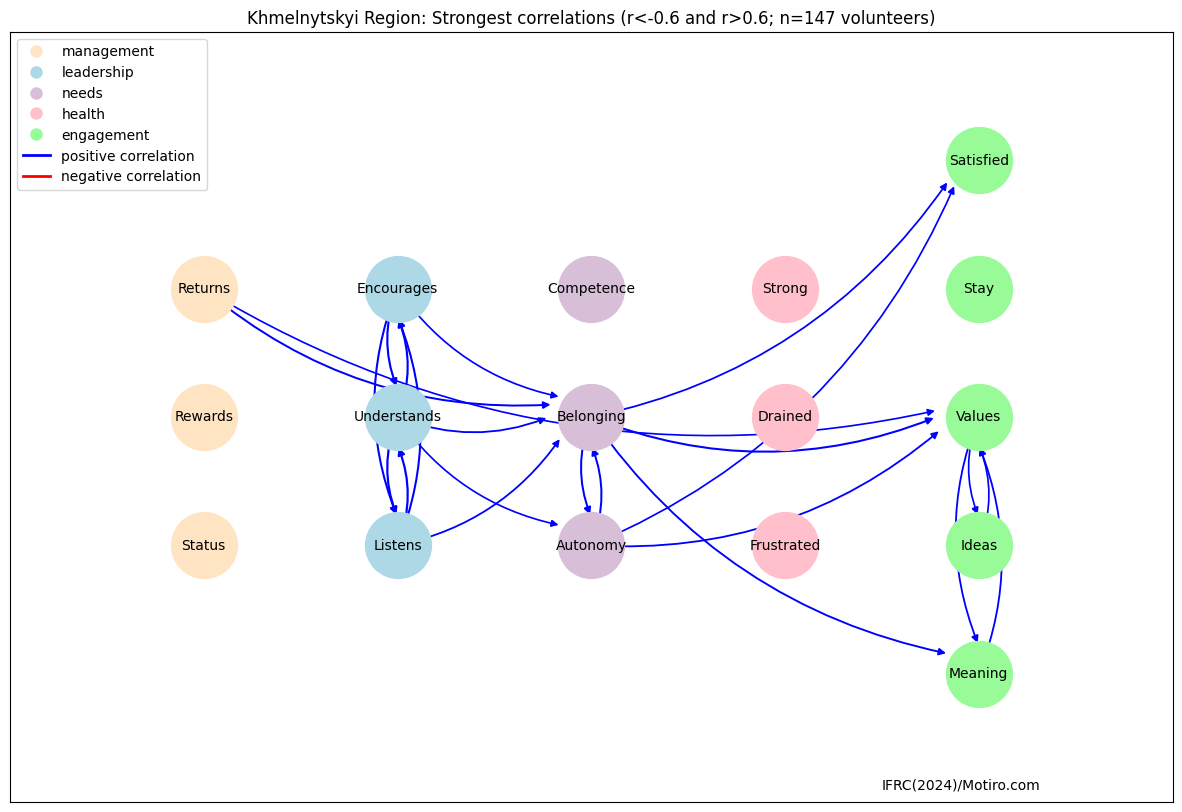

In [25]:
## STAFF Ukraine Red Cross Correlations network graph key variables on horizontal axis
## In English - for 1 region. Use to adjust correlation coeff thresholds
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.6
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']

# Select region
Region='Khmelnytskyi Region'
df = df[df['region'] == f'{Region}']

# Count the total number of individuals in filtered dataframe (n)
n = df['Volunteer'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle
def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'{Region}: Strongest correlations (r<{negcorr} and r>{poscorr}; n={n} volunteers)')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(f'URC {Region} SDTCorrNetworkGraphENG.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


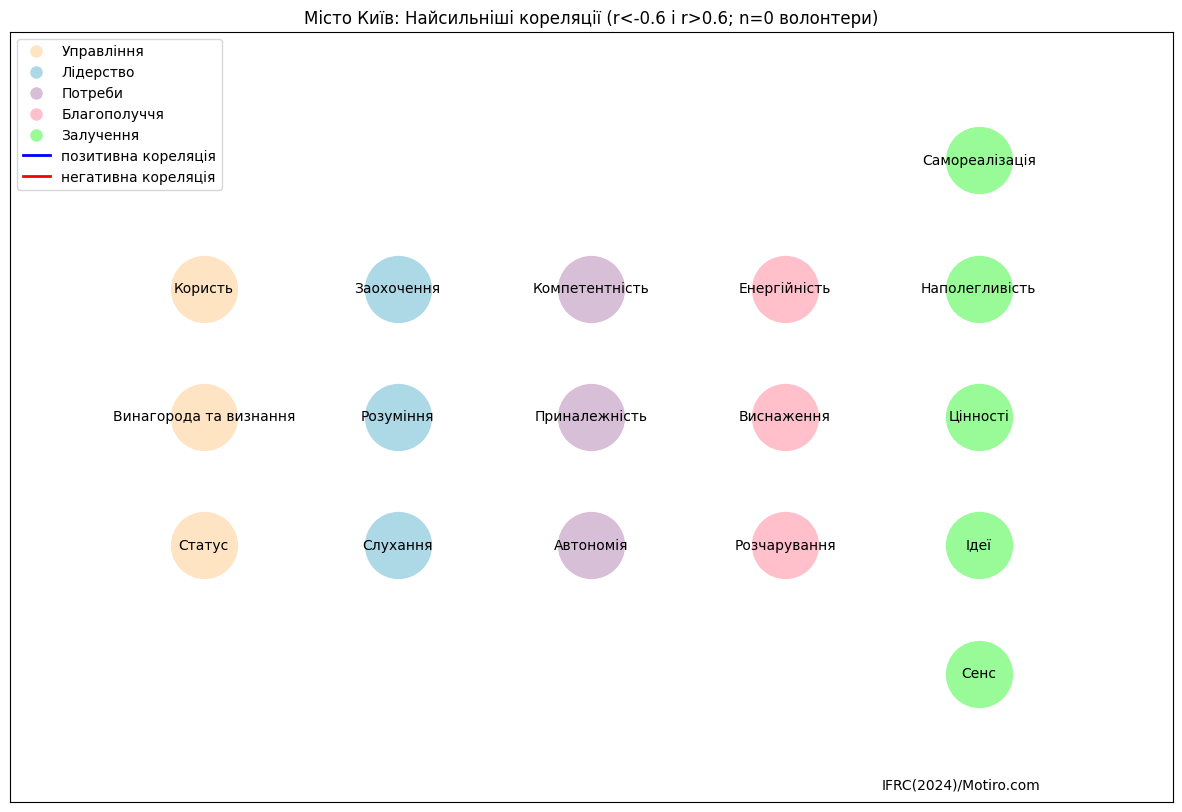

In [17]:
## Ukraine Red Cross Correlations network graph key variables on horizontal axis
## In Ukrainian
## for one region (use to adjust r thresholds when needed)
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.6
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']

# Dictionary to translate region names to Ukrainian
region_translations = {
    'Cherkasy Region': 'Черкаська область',
    'Chernihiv Region': 'Чернігівська область',
    'Chernivtsi Region': 'Чернівецька область',
    'Dnipro Region': 'Дніпропетровська область',
    'Donetsk Region': 'Донецька область',
    'Ivano-Frankivsk Region': 'Івано-Франківська область',
    'Kharkiv Region': 'Харківська область',
    'Kherson Region': 'Херсонська область',
    'Khmelnytskyi Region': 'Хмельницька область',
    'Kropyvnytskyi Region': 'Кіровоградська область',
    'Kyiv City': 'Місто Київ',
    'Kyiv Region': 'Київська область',
    'Lviv Region': 'Львівська область',
    'Mykolaiv Region': 'Миколаївська область',
    'Odessa Region': 'Одеська область',
    'Poltava Region': 'Полтавська область',
    'Rivne Region': 'Рівненська область',
    'Sumy Region': 'Сумська область',
    'Ternopil Region': 'Тернопільська область',
    'Vinnitsa Region': 'Вінницька область',
    'Volyn Region': 'Волинська область',
    'Zakarpattya Region': 'Закарпатська область',
    'Zaporizhya Region': 'Запорізька область',
    'Zytomyr Region': 'Житомирська область'
}

# Select region (In English)
Region= 'Kyiv City'
df = df[df['region'] == f'{Region}']

# Count the total number of individuals in filtered dataframe (n)
n = df['Volunteer'].sum()

columns = ['Team Name',
           'region',
           'Well-being',
           'Needs',
           'Engagement',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Management',
           'Returns',
           'Rewards',
           'Status',
           'Myself',
           'Tasks',
           'Free',
           'Mastery',
           'Competent',
           'Learn',
           'Group',
           'Talk',
           'Care',
           'Satisfied',
           'Meaning',
           'Stay',
           'Ideas',
           'Values',
           'Understands',
           'Encourages',
           'Listens',
           'Network',
           'Friendly',
           'Team',
           'Appreciated',
           'Responsibilities',
           'Work',
           'Impact',
           'Strong',
           'Drained',
           'Frustrated',
           'Volunteer',
           ]

#Create a dictionary to translate the column names to Ukrainian
column_names = {
    'region': 'region',
 #   'region': 'Область',
    'Team Name':  'Назва команди',
    'Well-being': 'Благополуччя',
    'Strong': 'Енергійність',
    'Drained': 'Виснаження',
    'Frustrated': 'Розчарування',
    'Engagement': 'Залучення',
    'Satisfied': 'Самореалізація',
    'Stay': 'Наполегливість',
    'Ideas': 'Ідеї',
    'Values': 'Цінності',
    'Meaning': 'Сенс',
    'Needs': 'Потреби',
    'Autonomy': 'Автономія',
    'Belonging': 'Приналежність',
    'Competence': 'Компетентність',
    'Leadership': 'Лідерство',
    'Listens': 'Слухання',
    'Understands': 'Розуміння',
    'Encourages': 'Заохочення',
    'Management': 'Управління',
    'Returns': 'Користь',
    'Rewards': 'Винагорода та визнання',
    'Status': 'Статус'
}

#rename the columns
df = df[columns].rename(columns=column_names)

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)

# Define variable sets
management_vars = ['Статус', 'Винагорода та визнання', 'Користь']
leadership_vars = ['Слухання', 'Розуміння', 'Заохочення']
needs_vars = ['Автономія', 'Приналежність', 'Компетентність']
health_vars = ['Розчарування', 'Виснаження', 'Енергійність']
engagement_vars = ['Сенс', 'Ідеї', 'Цінності', 'Наполегливість', 'Самореалізація']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}


# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
translated_labels = {
    'management_vars': 'Управління',
    'leadership_vars': 'Лідерство',
    'needs_vars': 'Потреби',
    'health_vars': 'Благополуччя',
    'engagement_vars': 'Залучення'
}

for label, color in colors.items():
    translated_label = translated_labels.get(label, label).replace('_vars', '')
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=translated_label, markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='позитивна кореляція'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='негативна кореляція'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

# Translate the region name for the title
region_ukr = region_translations.get(Region, Region)
plt.title(f'{region_ukr}: Найсильніші кореляції (r<{negcorr} і r>{poscorr}; n={n} волонтери)')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(f'URC {Region} SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


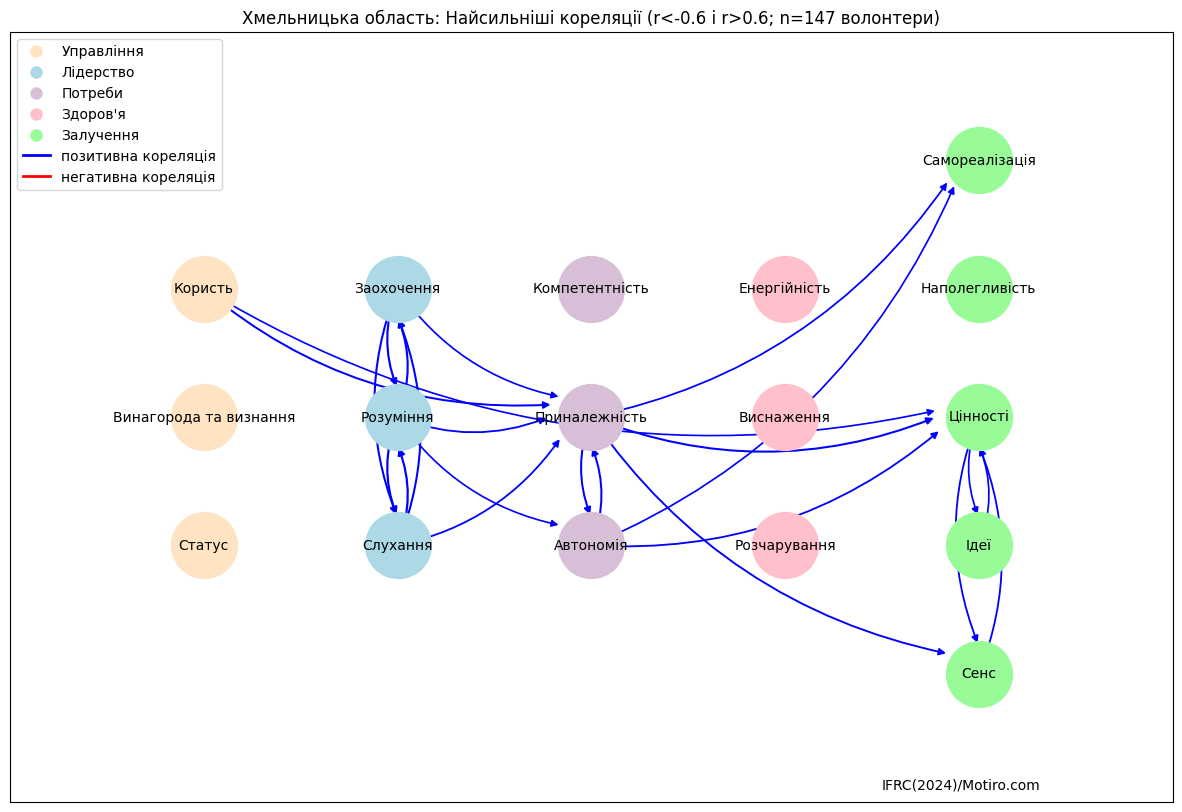

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


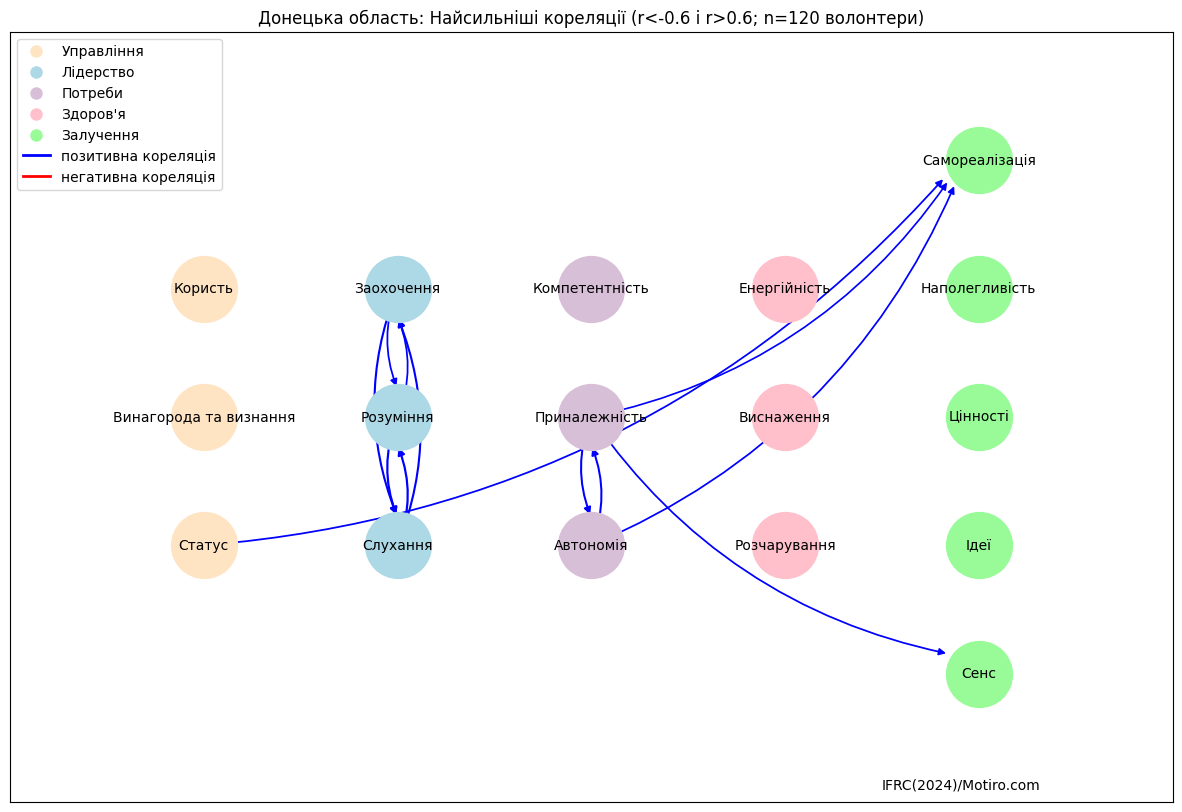

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


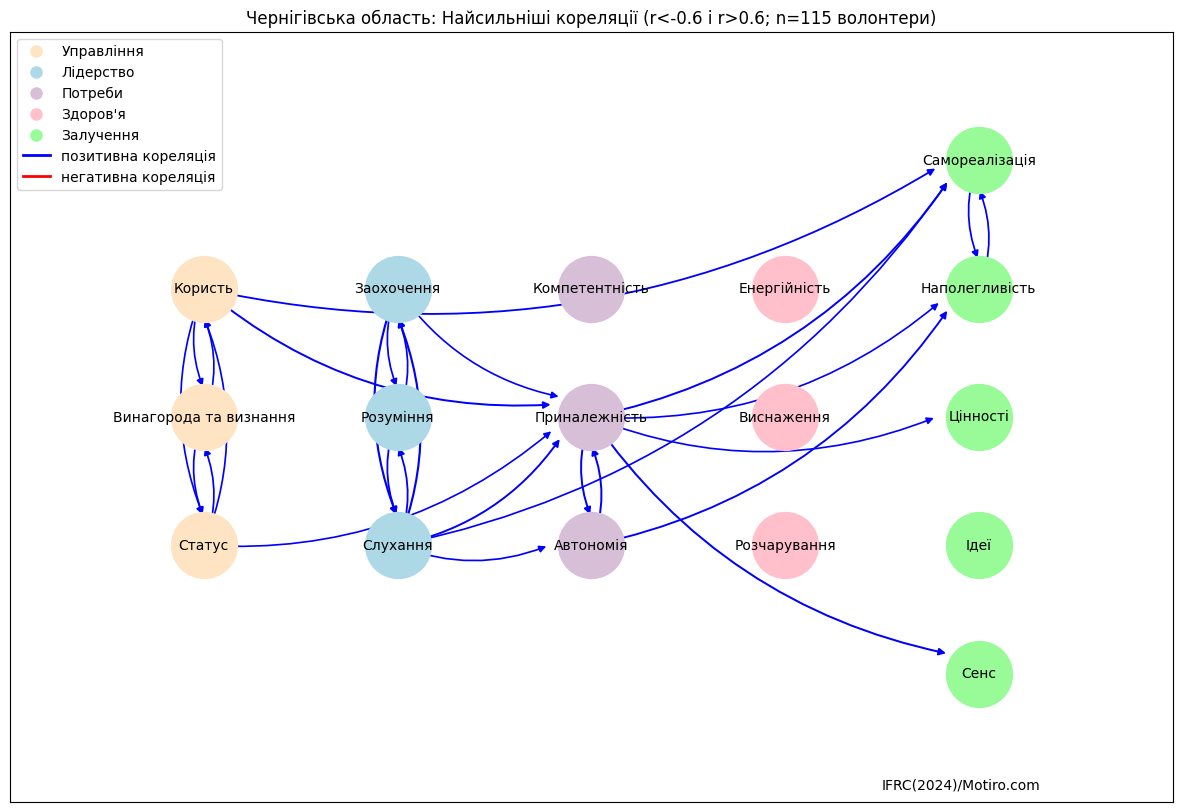

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


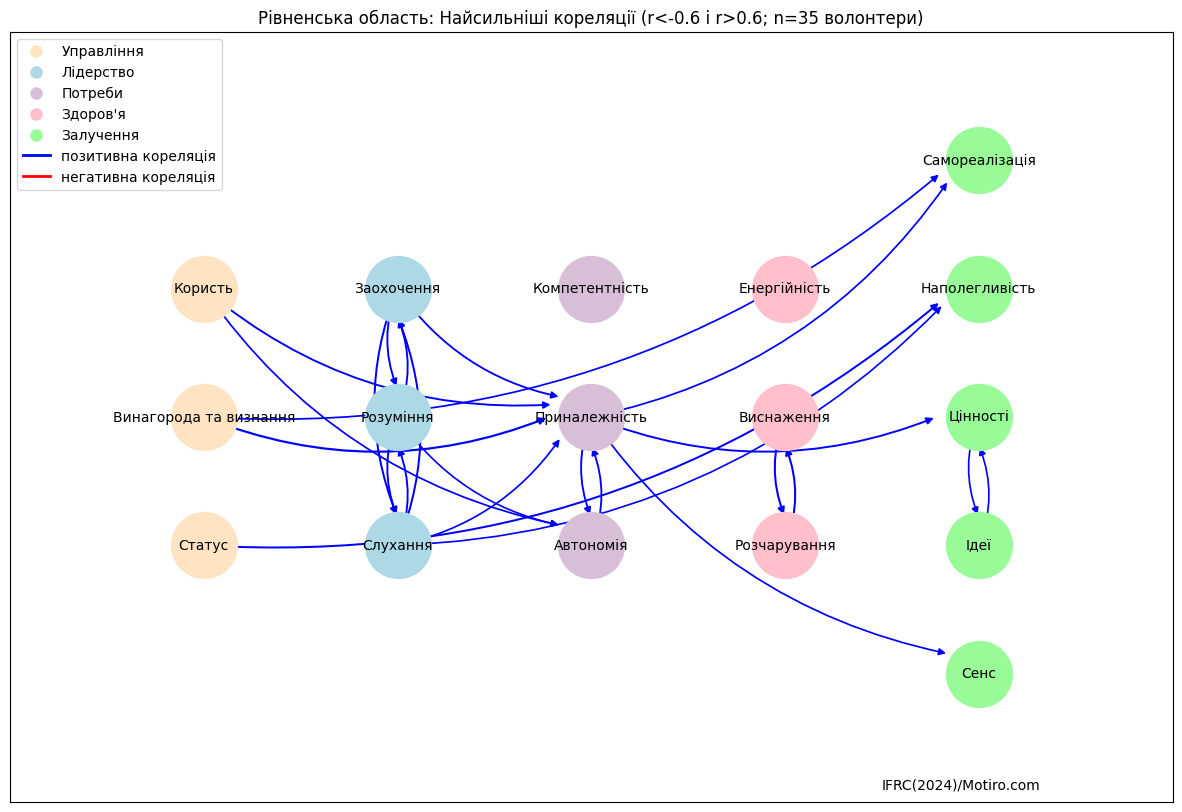

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


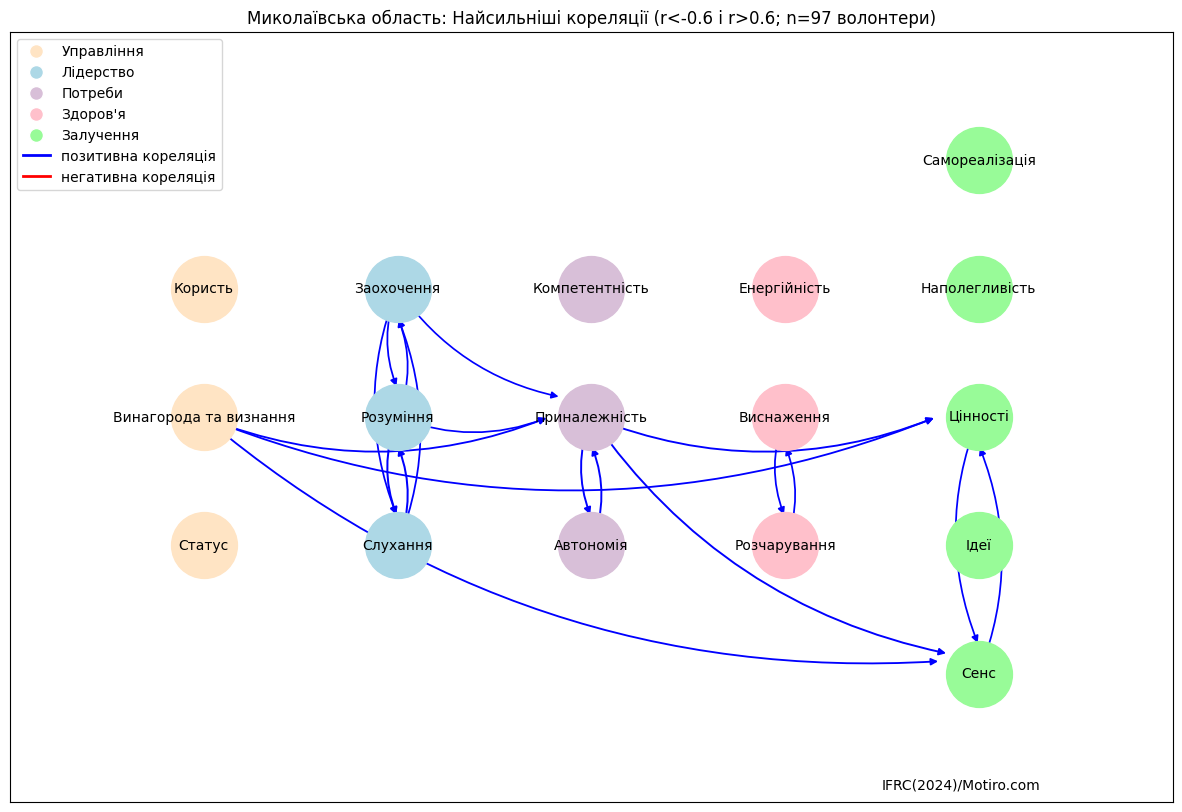

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


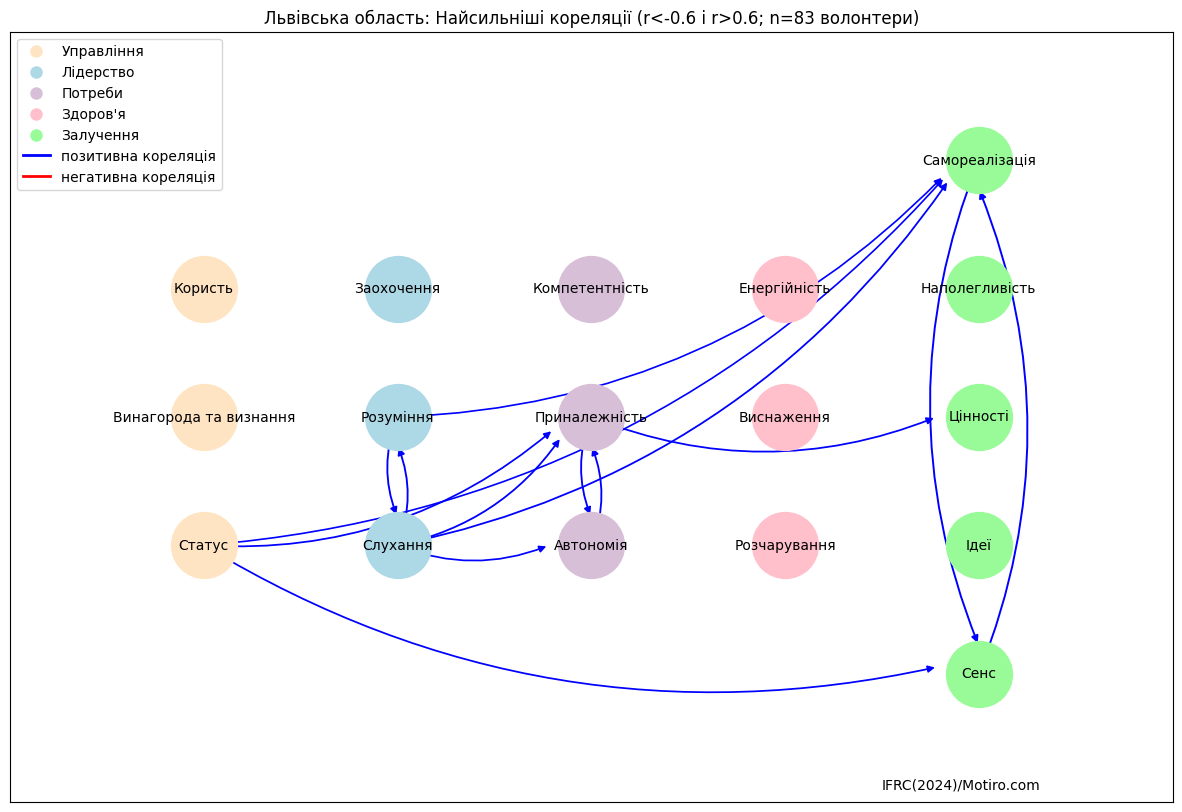

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


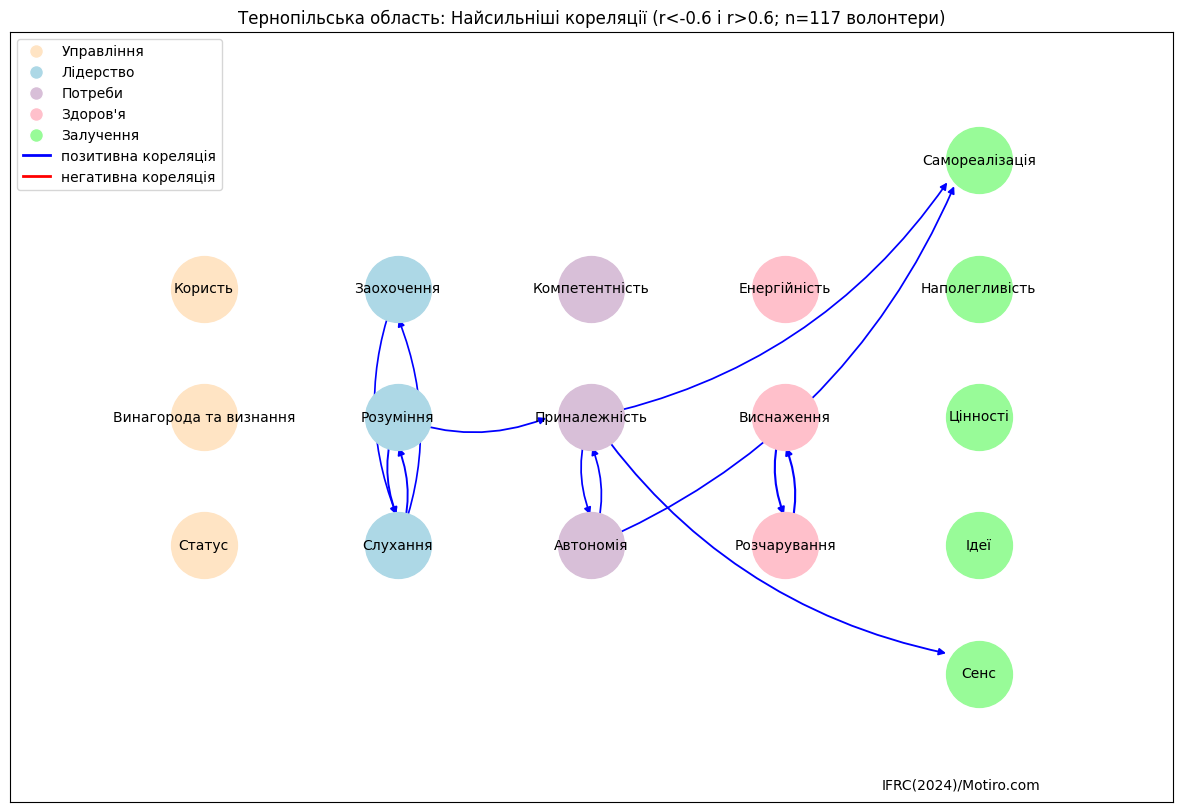

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


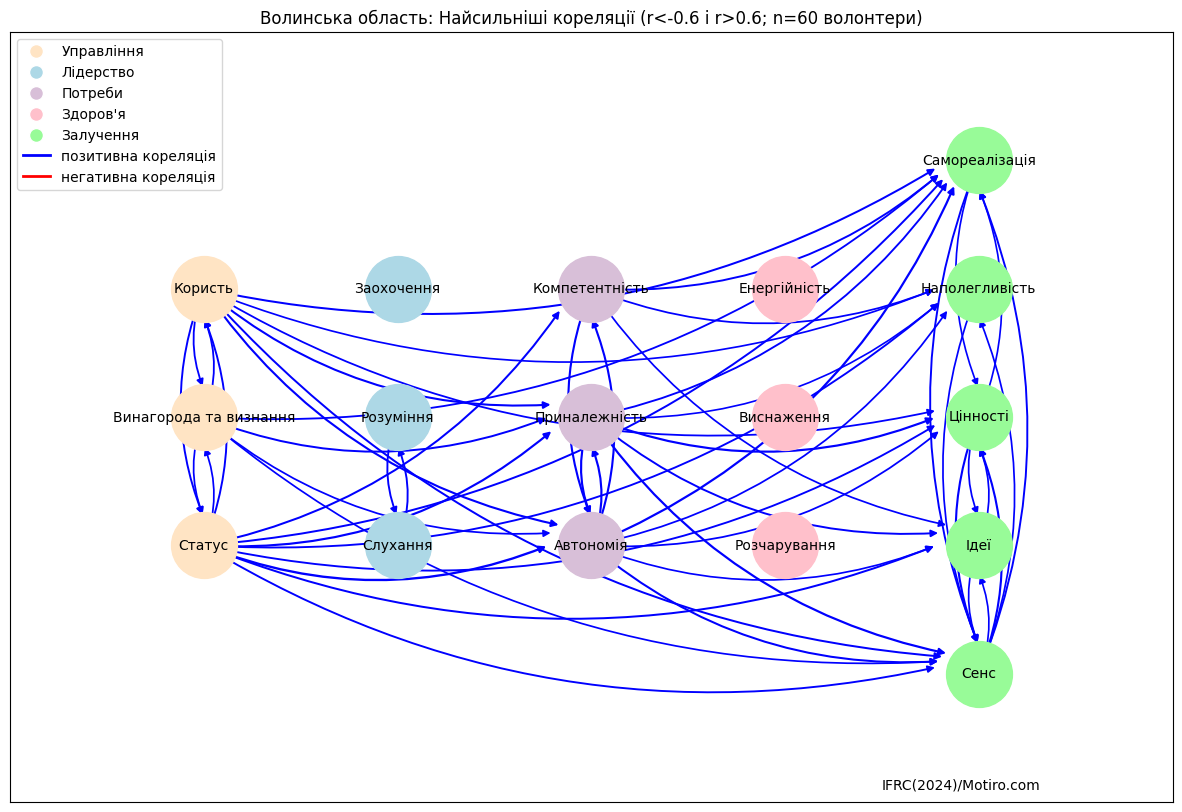

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


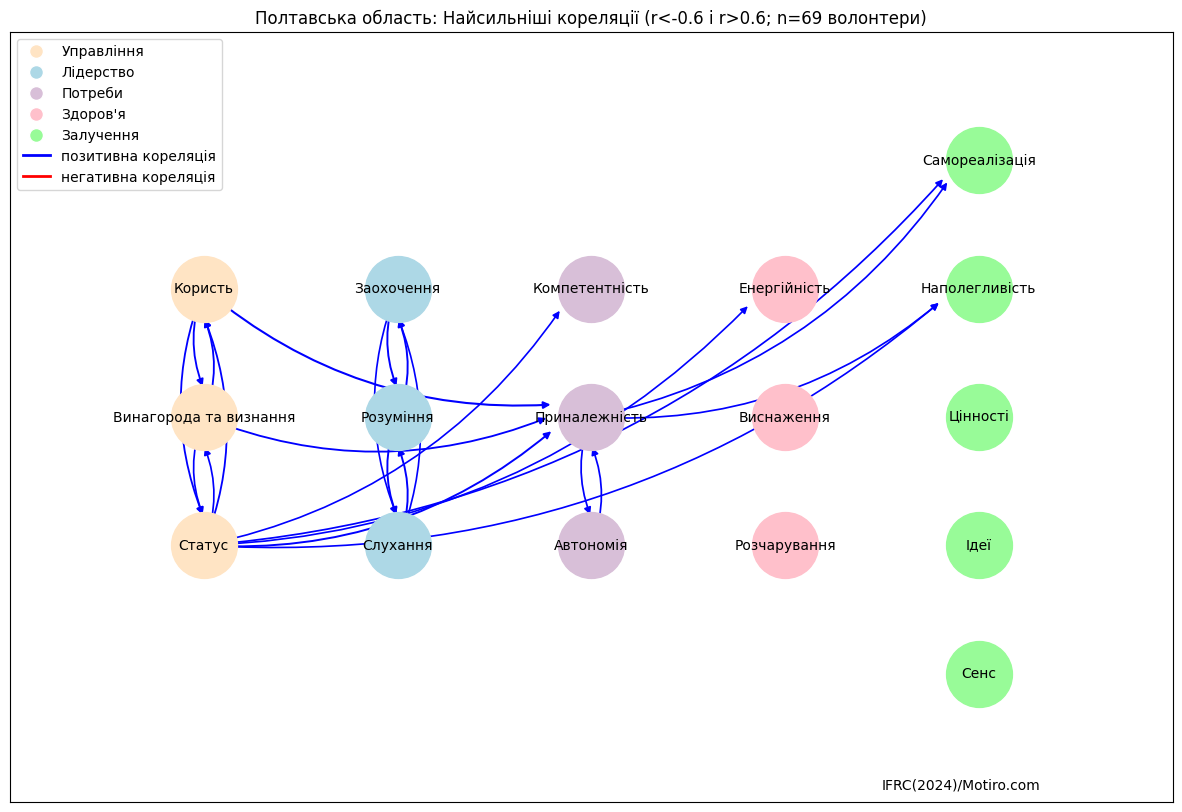

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


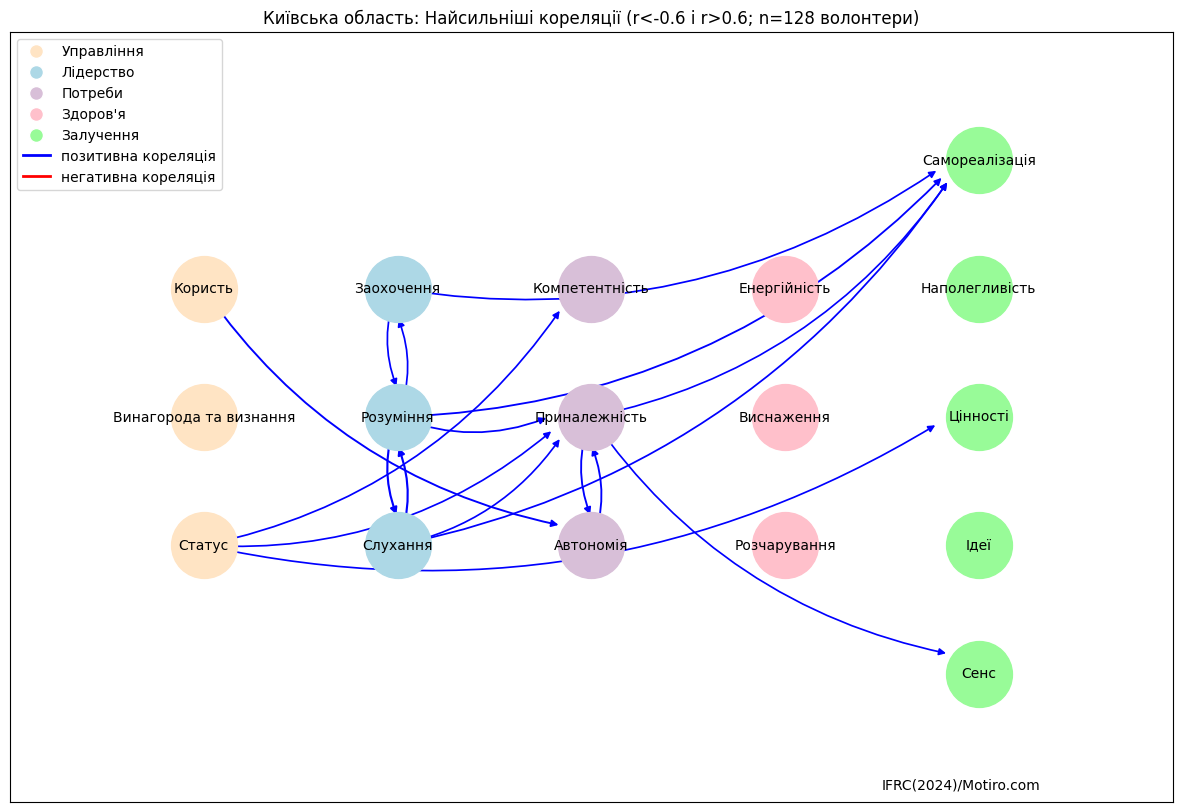

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


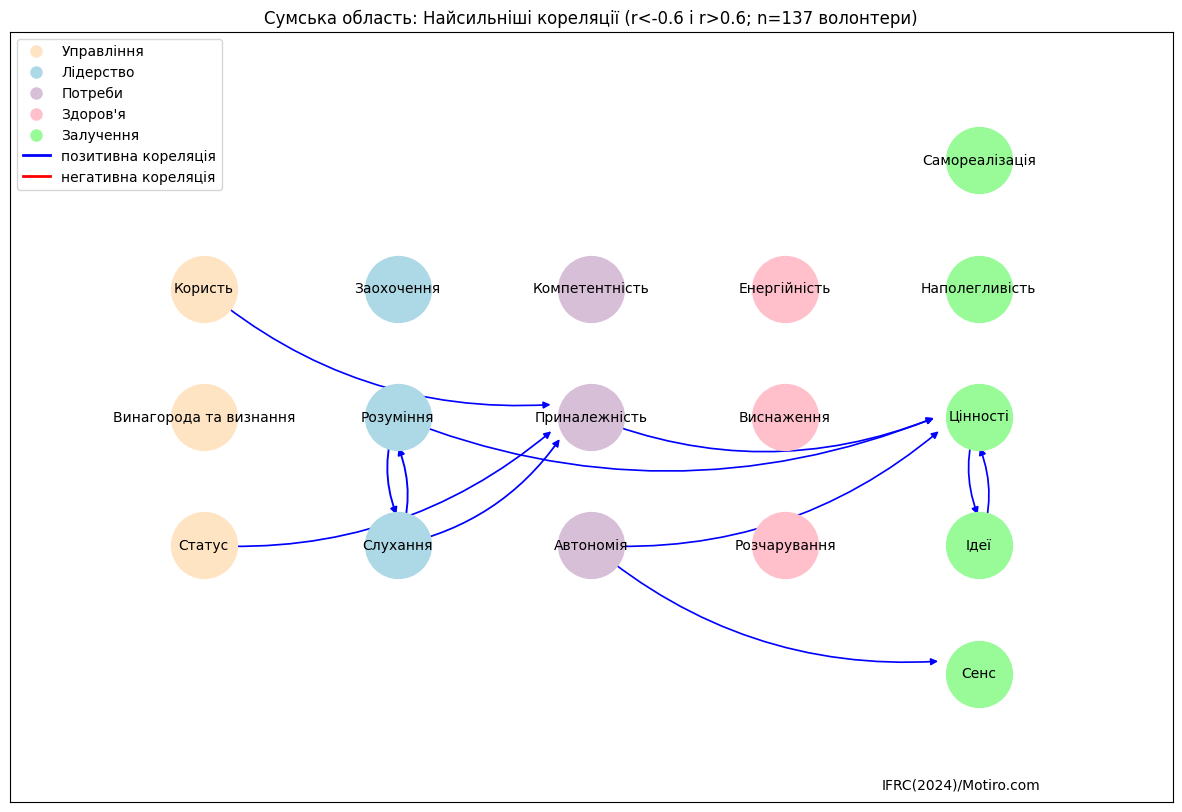

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


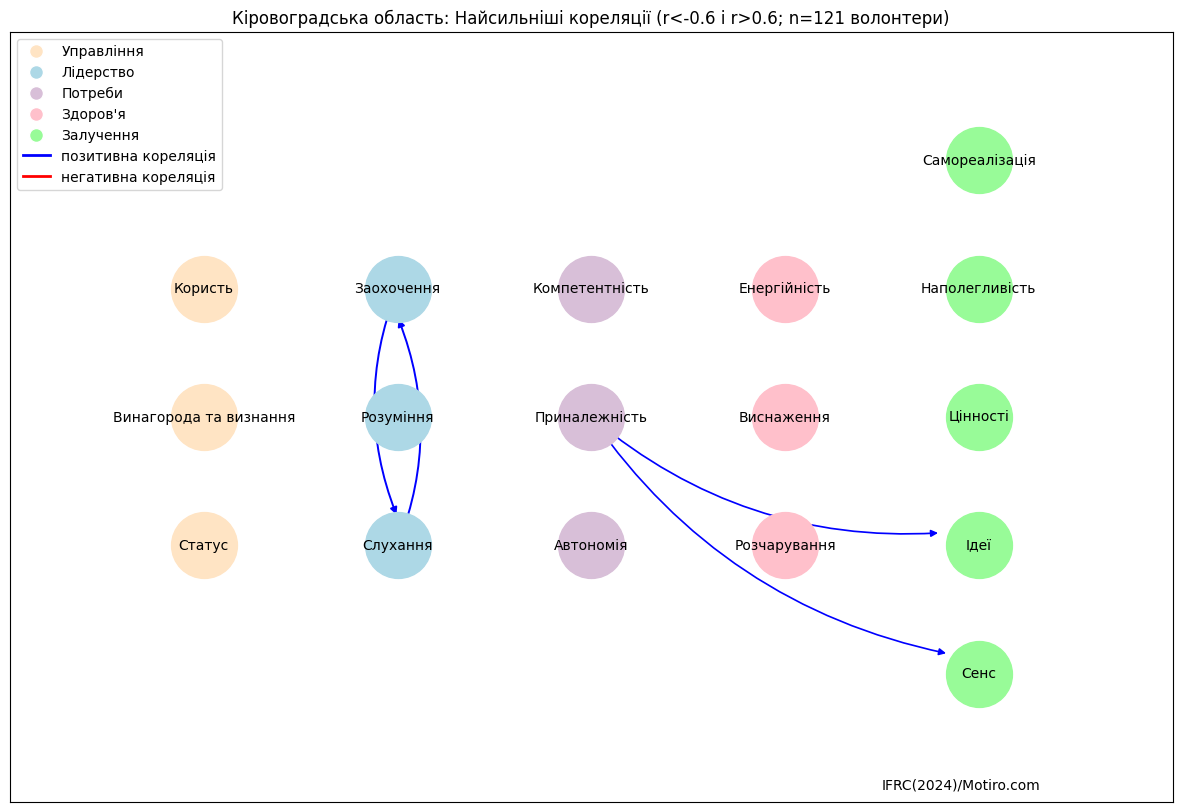

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


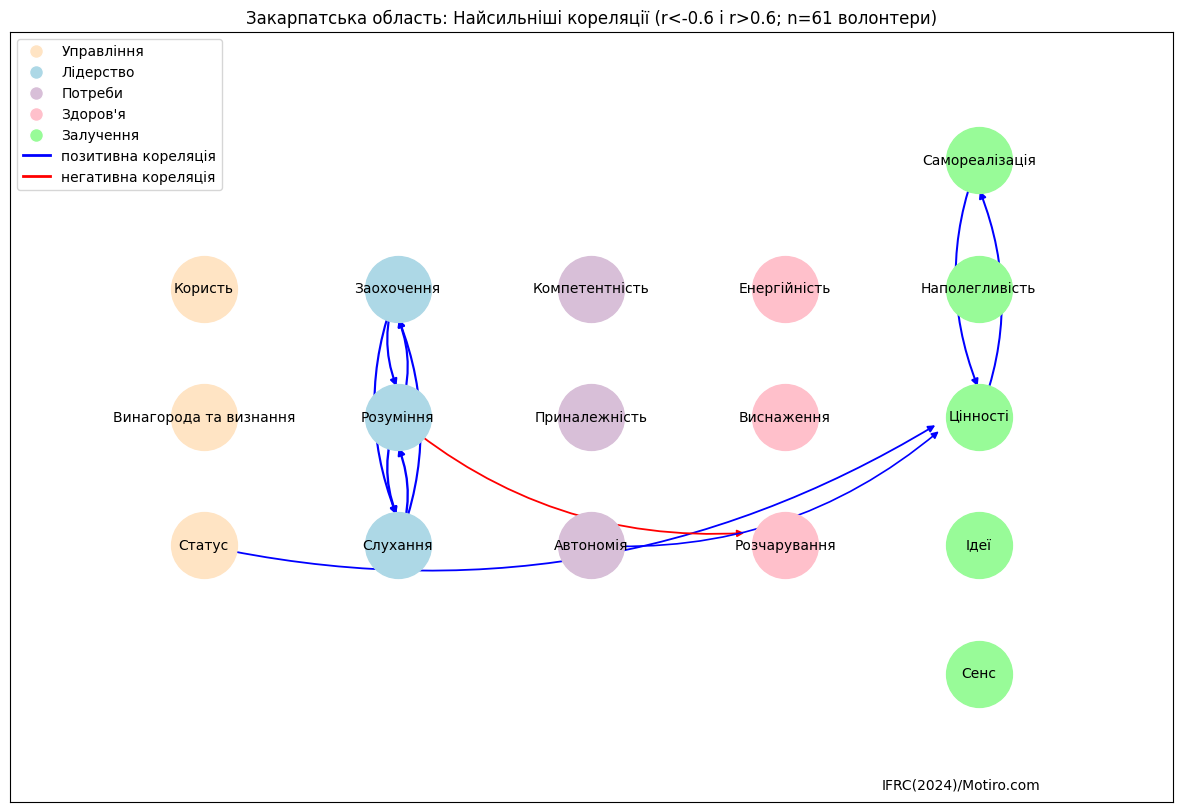

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


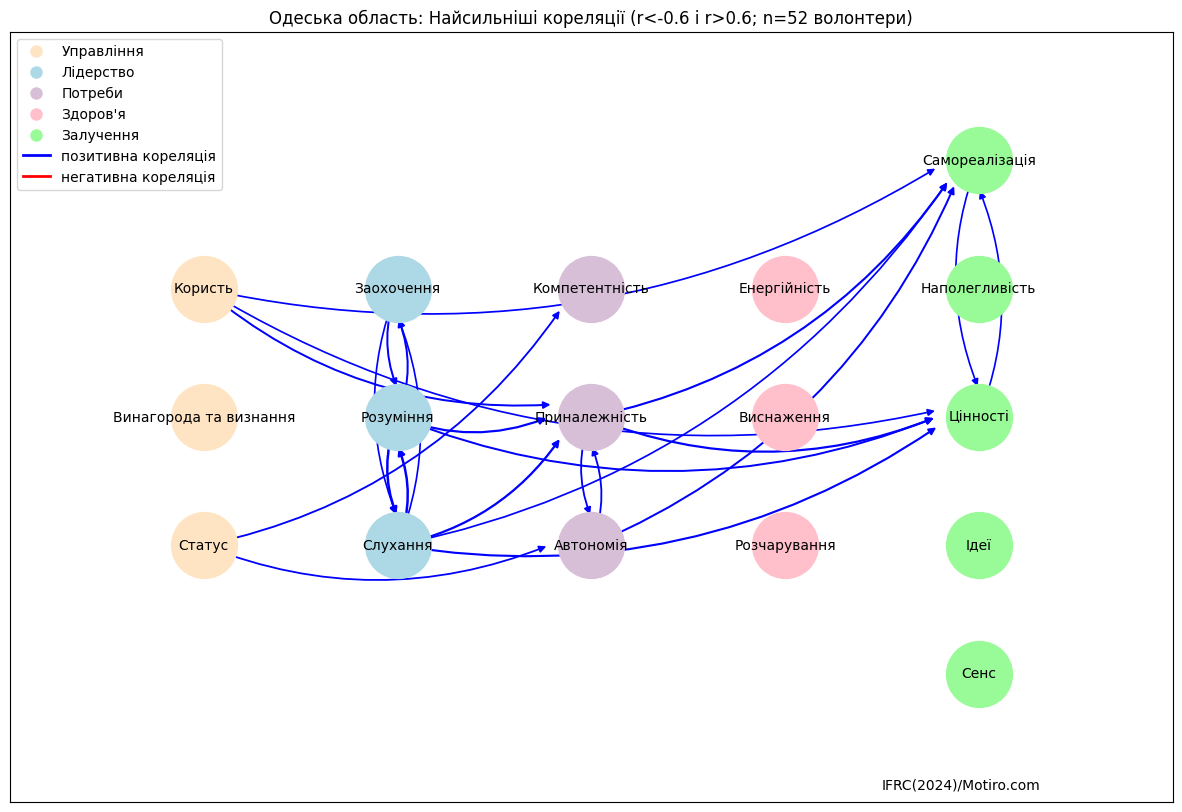

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


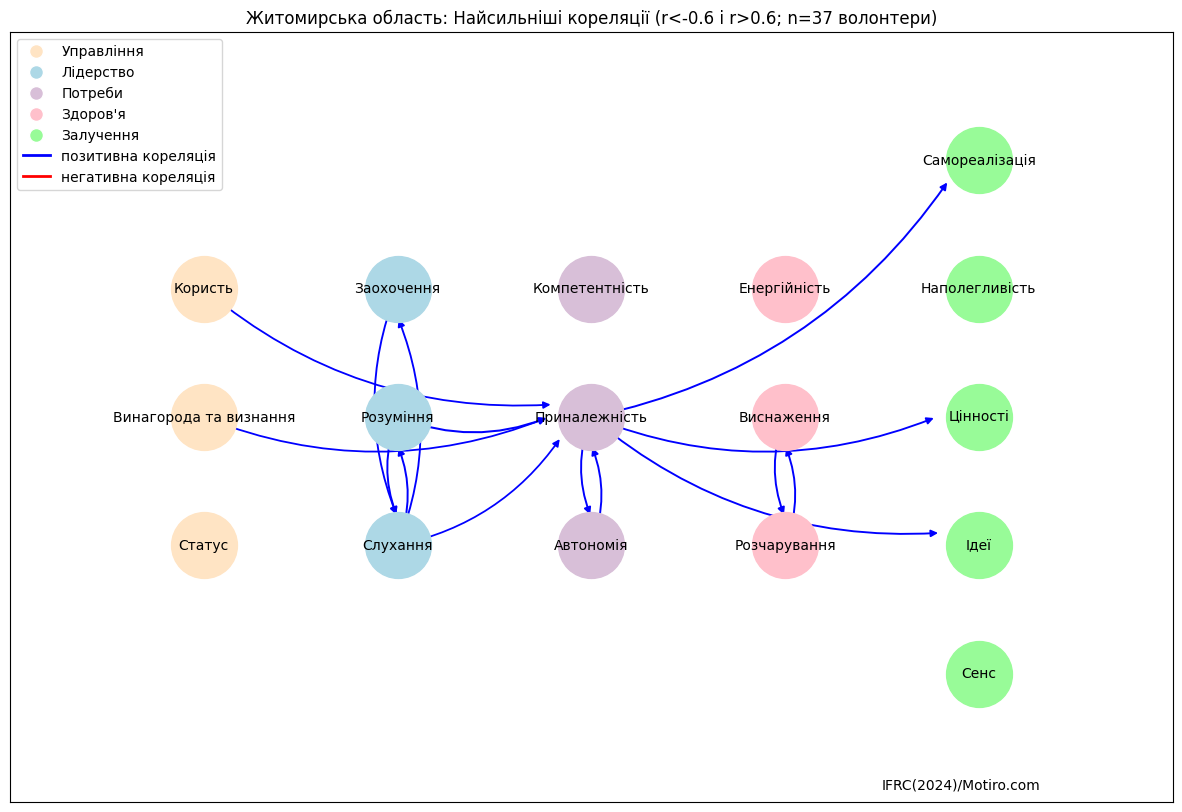

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


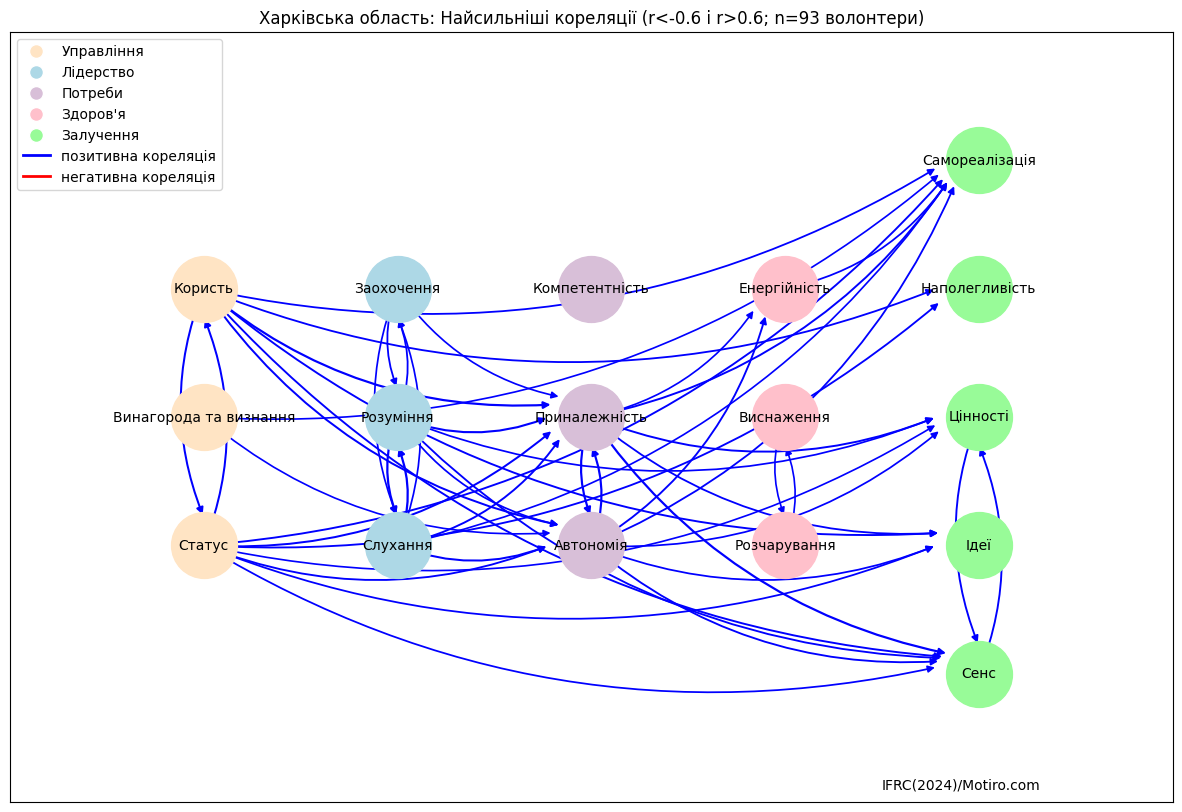

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


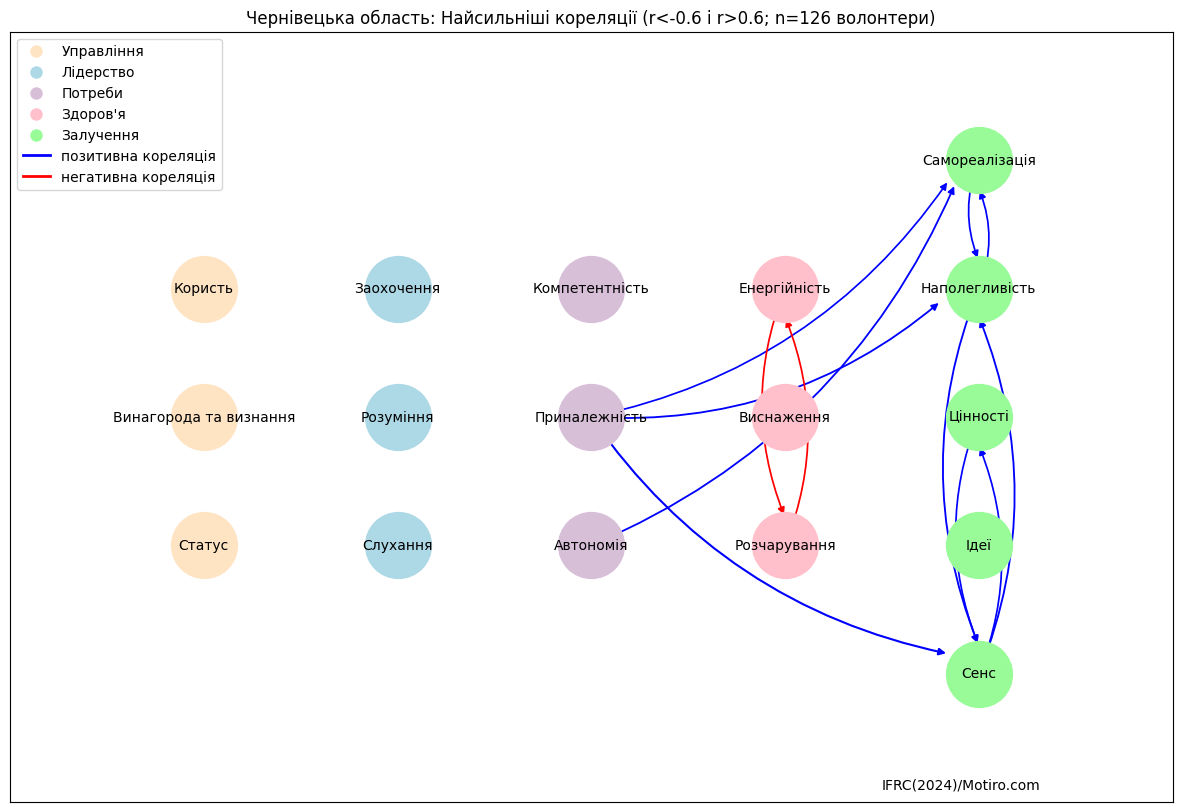

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


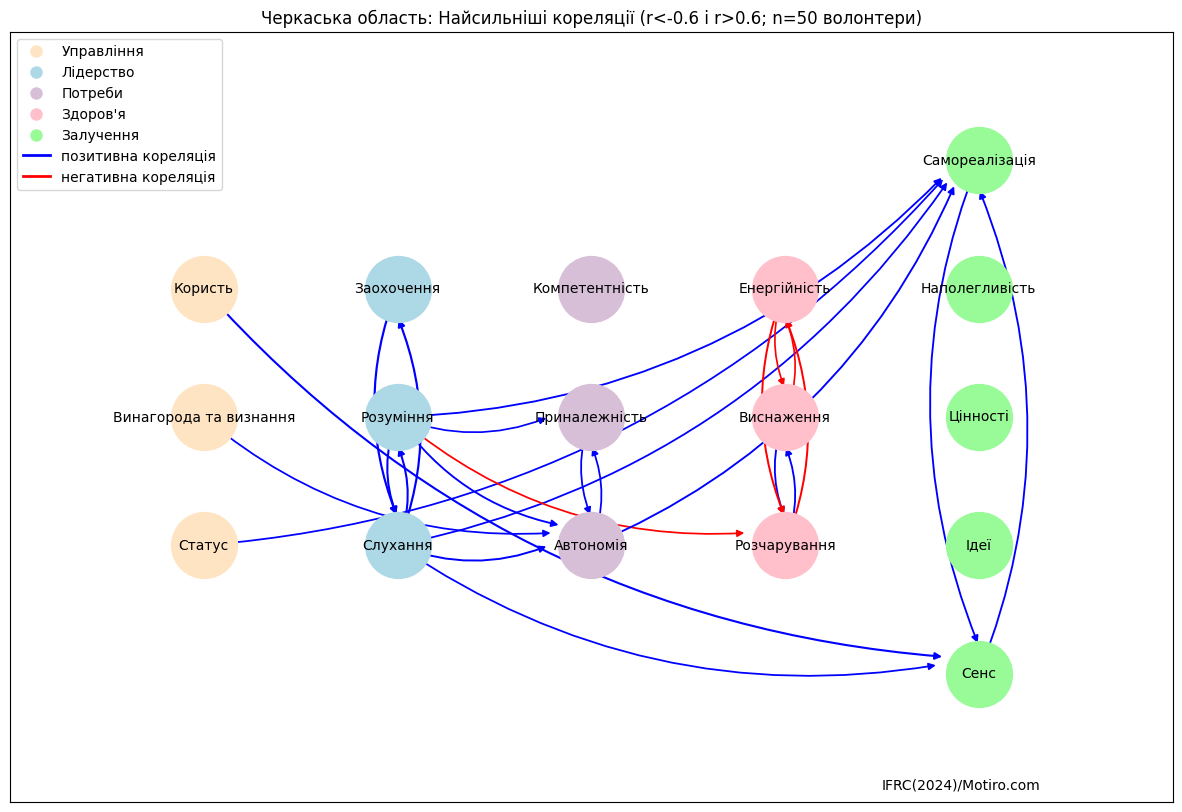

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


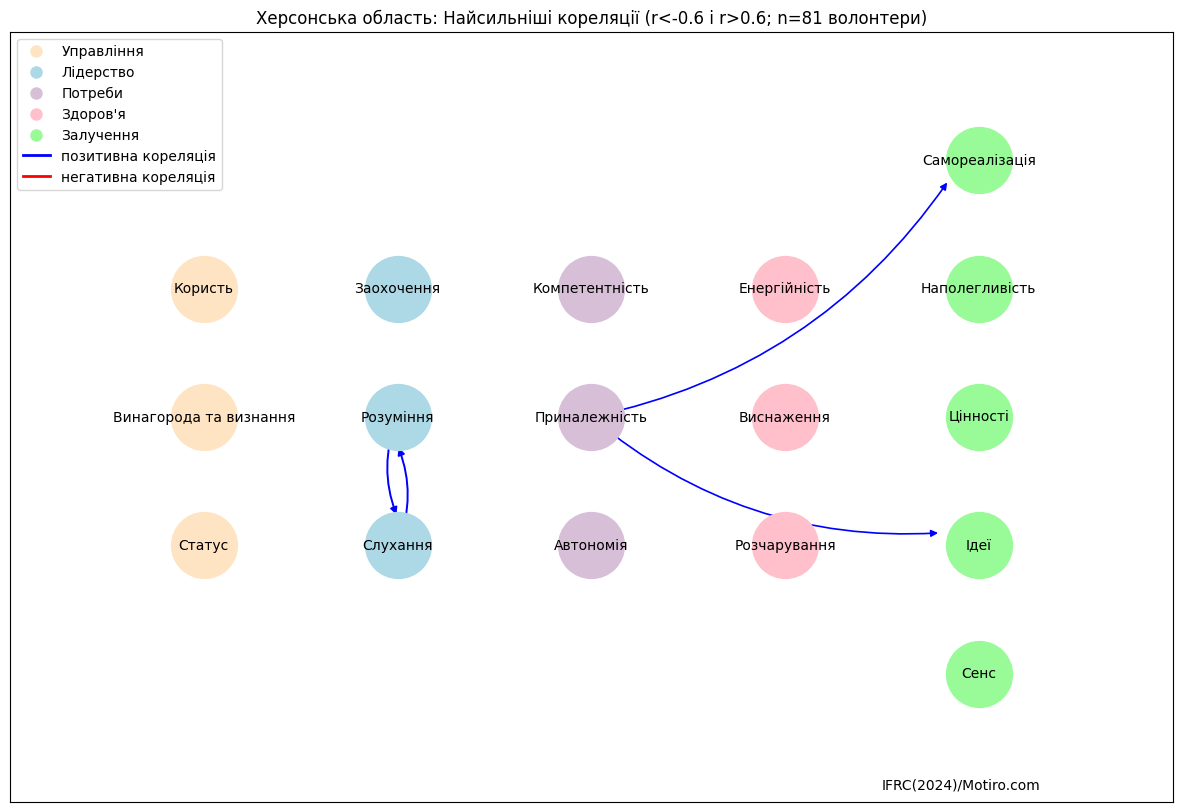

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


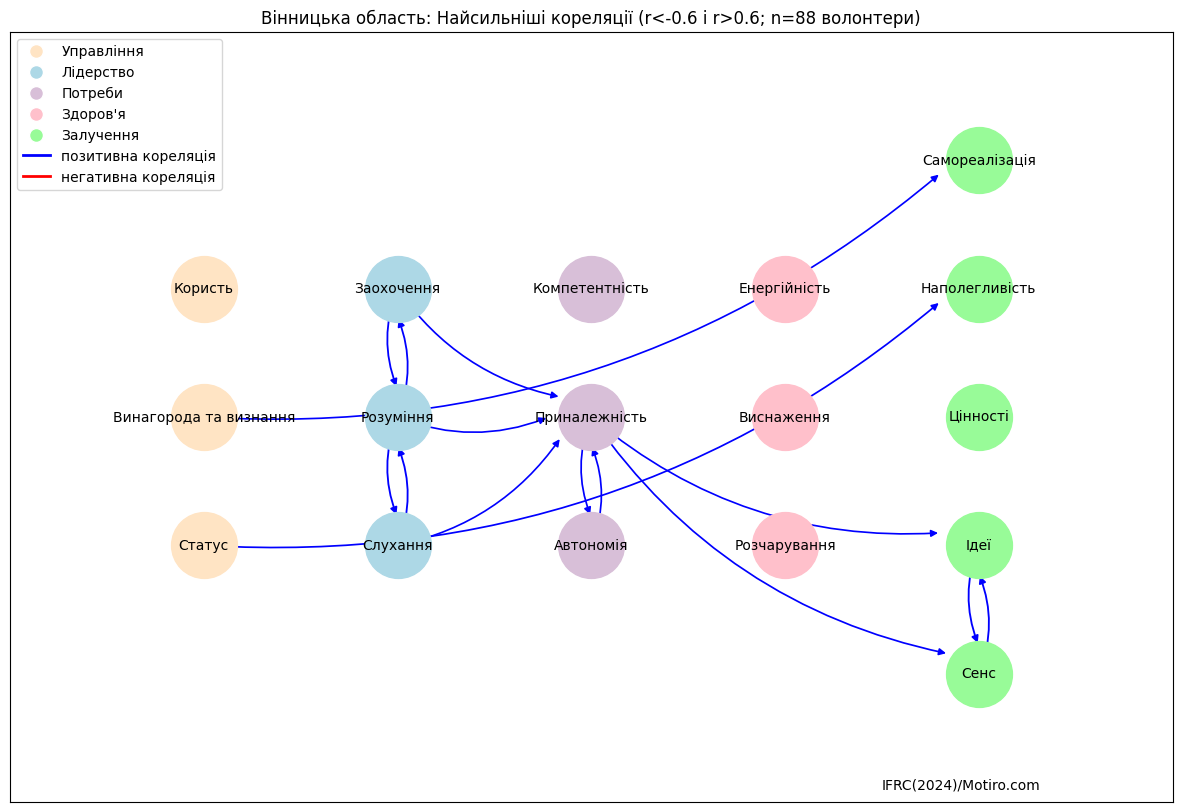

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


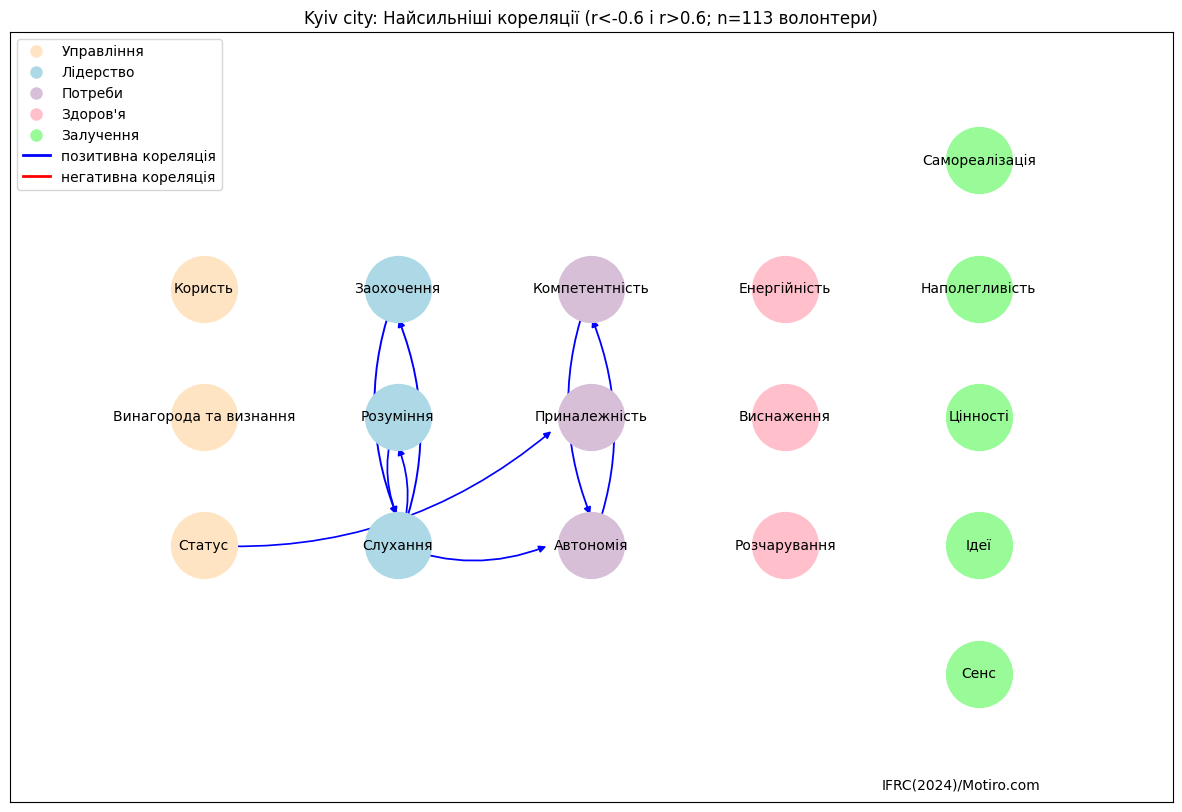

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


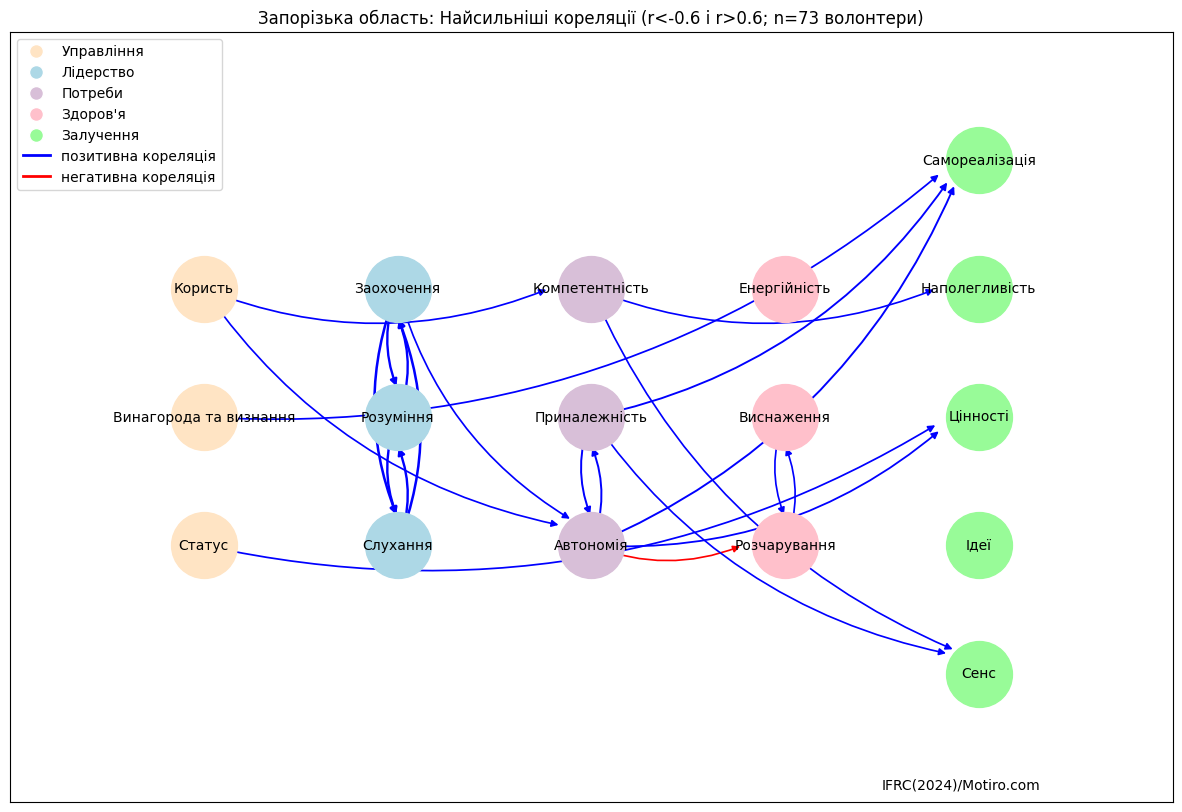

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


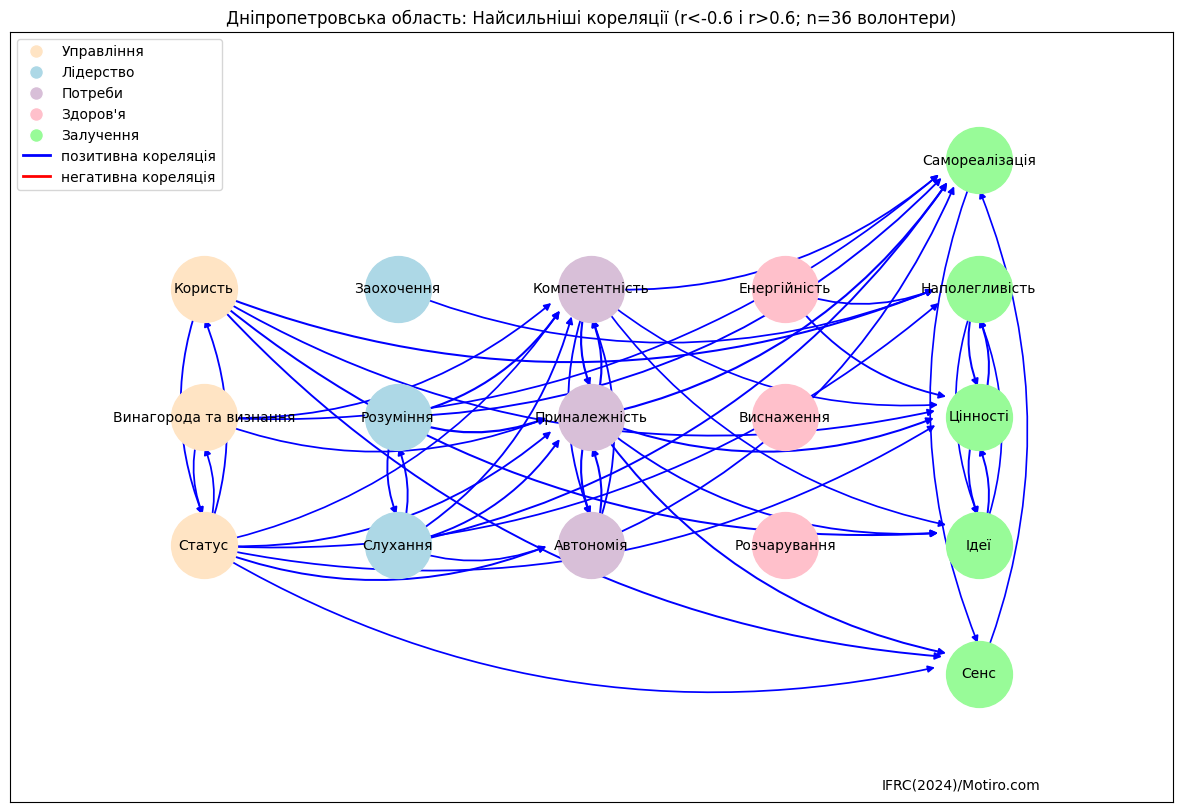

Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


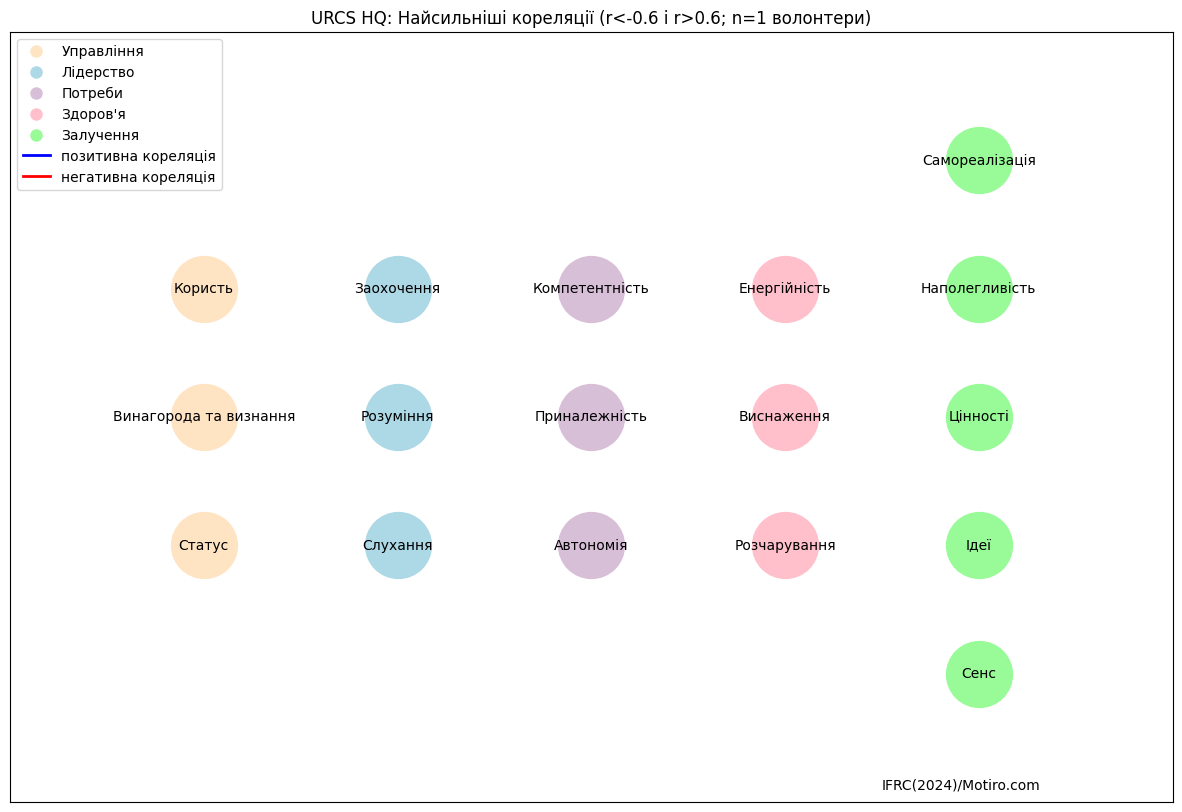

In [28]:
## STAFF Ukraine Red Cross Correlations network graph key variables on horizontal axis
## In Ukrainian
## for ALL regions (adjust r thresholds when current value is either too high or two low for most regions)
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

# Set correlation coefficient thresholds for graph
negcorr = -0.6
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']

# List of unique regions
regions = df['region'].unique()

# Define columns and translation dictionary
columns = ['Team Name', 'region', 'Well-being', 'Needs', 'Engagement', 'Autonomy', 'Belonging', 'Competence', 'Leadership', 'Management', 'Returns', 'Rewards', 'Status', 'Myself', 'Tasks', 'Free', 'Mastery', 'Competent', 'Learn', 'Group', 'Talk', 'Care', 'Satisfied', 'Meaning', 'Stay', 'Ideas', 'Values', 'Understands', 'Encourages', 'Listens', 'Network', 'Friendly', 'Team', 'Appreciated', 'Responsibilities', 'Work', 'Impact', 'Strong', 'Drained', 'Frustrated', 'Volunteer']

column_names = {
    'region': 'region',
    'Team Name': 'Назва команди',
    'Well-being': 'Благополуччя',
    'Strong': 'Енергійність',
    'Drained': 'Виснаження',
    'Frustrated': 'Розчарування',
    'Engagement': 'Залучення',
    'Satisfied': 'Самореалізація',
    'Stay': 'Наполегливість',
    'Ideas': 'Ідеї',
    'Values': 'Цінності',
    'Meaning': 'Сенс',
    'Needs': 'Потреби',
    'Autonomy': 'Автономія',
    'Belonging': 'Приналежність',
    'Competence': 'Компетентність',
    'Leadership': 'Лідерство',
    'Listens': 'Слухання',
    'Understands': 'Розуміння',
    'Encourages': 'Заохочення',
    'Management': 'Управління',
    'Returns': 'Користь',
    'Rewards': 'Винагорода та визнання',
    'Status': 'Статус'
}

# Define variable sets
management_vars = ['Статус', 'Винагорода та визнання', 'Користь']
leadership_vars = ['Слухання', 'Розуміння', 'Заохочення']
needs_vars = ['Автономія', 'Приналежність', 'Компетентність']
health_vars = ['Розчарування', 'Виснаження', 'Енергійність']
engagement_vars = ['Сенс', 'Ідеї', 'Цінності', 'Наполегливість', 'Самореалізація']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Dictionary to translate region names to Ukrainian
region_translations = {
    'Cherkasy Region': 'Черкаська область',
    'Chernihiv Region': 'Чернігівська область',
    'Chernivtsi Region': 'Чернівецька область',
    'Dnipro Region': 'Дніпропетровська область',
    'Donetsk Region': 'Донецька область',
    'Ivano-Frankivsk Region': 'Івано-Франківська область',
    'Kharkiv Region': 'Харківська область',
    'Kherson Region': 'Херсонська область',
    'Khmelnytskyi Region': 'Хмельницька область',
    'Kropyvnytskyi Region': 'Кіровоградська область',
    'Kyiv City': 'Місто Київ',
    'Kyiv Region': 'Київська область',
    'Lviv Region': 'Львівська область',
    'Mykolaiv Region': 'Миколаївська область',
    'Odessa Region': 'Одеська область',
    'Poltava Region': 'Полтавська область',
    'Rivne Region': 'Рівненська область',
    'Sumy Region': 'Сумська область',
    'Ternopil Region': 'Тернопільська область',
    'Vinnitsa Region': 'Вінницька область',
    'Volyn Region': 'Волинська область',
    'Zakarpattya Region': 'Закарпатська область',
    'Zaporizhya Region': 'Запорізька область',
    'Zytomyr Region': 'Житомирська область'
}

# Loop through each region and create a plot
for Region in regions:
    # Filter the dataframe for the current region
    df_region = df[df['region'] == Region]

    # Count the total number of individuals in the filtered dataframe (n)
    n = df_region['Volunteer'].sum()

    # Rename the columns
    df_region = df_region[columns].rename(columns=column_names)

    # Compute correlation matrix with numeric_only set to True to avoid warning
    corr_matrix = df_region.corr(numeric_only=True)

    # Create the graph
    G = nx.DiGraph()

    # Modify the node addition part to include the color attribute
    for var in all_vars:
        node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
        if var in management_vars:
            node_color = colors['management_vars']
        elif var in leadership_vars:
            node_color = colors['leadership_vars']
        elif var in needs_vars:
            node_color = colors['needs_vars']
        elif var in health_vars:
            node_color = colors['health_vars']
        else:
            node_color = colors['engagement_vars']
        G.add_node(var, size=node_size, color=node_color)

    # Adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle
    def adjust_line_to_circle(x1, y1, x2, y2, r):
        angle = math.atan2(y2 - y1, x2 - x1)
        x2_new = x2 - r * math.cos(angle)
        y2_new = y2 - r * math.sin(angle)
        return x1, y1, x2_new, y2_new

    # Add edges with color and weight attributes
    for var1 in all_vars:
        for var2 in all_vars:
            correlation = corr_matrix[var1][var2]
            if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
                weight = abs(correlation)
                color = 'blue' if correlation > 0 else 'red'
                
                # Define the direction based on variable sets
                if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif var1 in health_vars and var2 in engagement_vars:
                    G.add_edge(var1, var2, weight=weight, color=color)
                elif set([var1, var2]).issubset(set(management_vars)) or \
                     set([var1, var2]).issubset(set(leadership_vars)) or \
                     set([var1, var2]).issubset(set(needs_vars)) or \
                     set([var1, var2]).issubset(set(health_vars)) or \
                     set([var1, var2]).issubset(set(engagement_vars)):
                    # Only add bidirectional arrows if they're in the same set
                    G.add_edge(var1, var2, weight=weight, color=color)
                    G.add_edge(var2, var1, weight=weight, color=color)

    # Create positions for nodes
    positions = {}
    spacing_h = 1
    spacing_v = 1

    # Compute maximum group length for vertical centering
    max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

    for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
        # Compute the starting y-coordinate for this group
        start_y = (max_len - len(group)) * spacing_v / 2
        
        for j, var in enumerate(group):
            positions[var] = (i * spacing_h, start_y + j * spacing_v)

    for node, attributes in G.nodes(data=True):
        if np.isnan(attributes['size']):
            G.nodes[node]['size'] = 75  # Set default size

    for node, data in G.nodes(data=True):
        print(node, data)

    # Dummy lines for the legend
    from matplotlib.lines import Line2D
    legend_elements = []

    # Adding legend for nodes
    translated_labels = {
        'management_vars': 'Управління',
        'leadership_vars': 'Лідерство',
        'needs_vars': 'Потреби',
        'health_vars': 'Здоров\'я',
        'engagement_vars': 'Залучення'
    }

    for label, color in colors.items():
        translated_label = translated_labels.get(label, label).replace('_vars', '')
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label=translated_label, markersize=10, markerfacecolor=color))

    # Adding legend for edges
    legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='позитивна кореляція'))
    legend_elements.append(Line2D([0], [0], color='red', lw=2, label='негативна кореляція'))

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 10))

    # Modify the Draw nodes part to use the color from the node attributes
    for node, (x, y) in positions.items():
        node_color = G.nodes[node]['color']
        ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
        ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

    # Draw edges with a slight curve using connectionstyle
    for u, v, data in G.edges(data=True):
        x1, y1 = positions[u]
        x2, y2 = positions[v]
        
        # Adjust end of arrow to connect to the node circle's periphery
        node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
        x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

        arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                          connectionstyle="arc3,rad=0.2")  # Adding a curve
        plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

    # Add the legend to the plot
    ax.legend(handles=legend_elements, loc='upper left')

    # Translate the region name for the title
    region_ukr = region_translations.get(Region, Region)
    plt.title(f'{region_ukr}: Найсильніші кореляції (r<{negcorr} і r>{poscorr}; n={n} волонтери)')
    plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
    plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
    plt.ylim(-1, max_len)  # Using max_len for the ylim

    # Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f'URC {Region} SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()